In [4]:
import random

In [1]:
import numpy as np

In [ ]:
def move_prey():
    nbr = len(adj)
    dir = np.random(4)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt




In [10]:
Graphs = []

In [85]:
no_of_edges = 0
G = nx.cycle_graph(50)
while no_of_edges <= 25:
    r1 = random.randrange(0,49)
    d1 = G.degree[r1]

    if d1<3:
        # lower bound inclusive & upper bound not inclusive in range
        # r2 = random.sample(range(r1-5,r1-1), 4)   
        l1 = [*range(r1-5,r1,1)]
        # lower bound inclusive & upper bound not inclusive in range
        # r3 = random.sample(range(r1+2,r1+6), 4)
        l2 = [*range(r1+1,r1+6,1)]
        joinedList = l1 + l2
        for i in range(10):
            if joinedList[i] < 0:
                joinedList[i] += 50
            elif joinedList[i] > 49:
                joinedList[i] -= 50
        edge_added = False
        while edge_added == False:
            r2 = random.choice(joinedList)
            d2 = G.degree[r2]
            if d2<3:
                edge_added = True
                G.add_edge(r1,r2)
                no_of_edges += 1
Graphs.append(G)
len(Graphs)

50

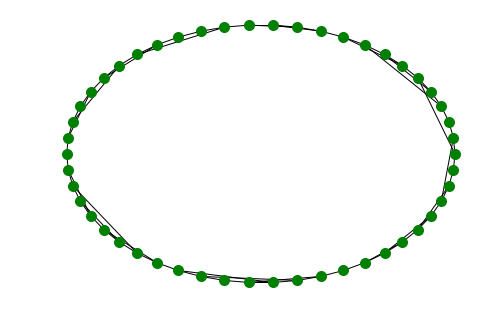

In [155]:
def gen_graphs():
    no_of_edges = 0
    G = nx.cycle_graph(50)
    while no_of_edges <= 25:
        r1 = random.randrange(0,49)
        d1 = G.degree[r1]

        if d1<3:
            # lower bound inclusive & upper bound not inclusive in range
            # r2 = random.sample(range(r1-5,r1-1), 4)   
            l1 = [*range(r1-5,r1,1)]
            # lower bound inclusive & upper bound not inclusive in range
            # r3 = random.sample(range(r1+2,r1+6), 4)
            l2 = [*range(r1+1,r1+6,1)]
            joinedList = l1 + l2
            for i in range(10):
                if joinedList[i] < 0:
                    joinedList[i] += 50
                elif joinedList[i] > 49:
                    joinedList[i] -= 50
            edge_added = False
            while edge_added == False:
                r2 = random.choice(joinedList)
                d2 = G.degree[r2]
                if d2<3:
                    edge_added = True
                    G.add_edge(r1,r2)
                    no_of_edges += 1
    return G

nx.draw_circular(G, scale = 1, node_size=100, node_color='green')
plt.draw()

In [99]:
def BFS(G, start, finish):
    vis = [0] * 50
    q = [[start, 0]]
    #path = list()
    vis[start] = 1
    dis = 0
    #q.append(list([0,0]))
    #print(q)
    while len(q) != 0:
        node = q.pop(0)
        #print("q " , q)
        #node = path[-1]
        #print("Path " , path)
        if node[0] == finish :
            return node[1]
        for i in G[node[0]]:
            if vis[i] != 1:
                #new_path = list(path)
                #print("new_path1 " , new_path)
                #new_path.append(i)
                q.append([i, node[1]+1])
                vis[i] = 1

In [88]:
def init_rand_pos():
    prey = random.randint(0, 49)
    pred = random.randint(0, 49)

    agent = random.randint(0, 49)
    while agent == prey or agent == pred:
        agent = random.randint(0, 49)
    return (prey, pred, agent) 

In [136]:
G[49]

AtlasView({48: {}, 0: {}})

In [89]:
def move_prey(prey):
    move = random.randint(0, 2)
    if move == 0:
        return prey
    else:
        return [i for i in G.neighbors(prey)][move-1]

In [90]:
def move_pred(pred, agent):
    min_ad = 100
    for i in G[agent]:
        agent_dis = BFS(G, i, agent)
        if agent_dis < min_ad:
            min_ad = agent_dis
            next = i
    return next

# Agent 1

In [120]:
move = random.randint(0, 3)
move

3

In [103]:
success = 0
fail1 = 0
fail2 = 0
for i in range(50):  
    print(i)
    G = Graphs[i]
    for runs in range(100):
        prey, pred, agent = init_rand_pos()
        #print("RUN #", runs)
        #print(prey, pred, agent)
        next_pos = -1
        time = 0
        while time < 1000:
            min_yd = 100
            max_dd = -1
            for i in G[agent]:
                #print("i", i)
                prey_dis = BFS(G, i, prey)
                #print("prey_dis", prey_dis)
                pred_dis = BFS(G, i, pred)
                #print('pred_dis', pred_dis)
                if prey_dis < min_yd:
                    min_yd = prey_dis
                    max_dd = pred_dis
                    next_pos = i
                elif prey_dis == min_yd:
                    if pred_dis > max_dd:
                        max_dd = prey_dis
                        next_pos = i

            #print("next_pos", next_pos)       
            
            agent = next_pos
            if agent == prey:
                break
    
            prey = move_prey(prey)
            pred = move_pred(pred, agent)
            #print(prey, pred, agent)
            if agent == prey  or agent == pred:
                break
            time += 1
            #print("time",time)
        if agent == pred:
            fail1 += 1
        elif agent == prey:
            success += 1
        elif time == 1000:
            fail2 += 1
        
success/5000, fail1/5000, fail2/5000

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(0.8028, 0.1972, 0.0)

# Agent 2

# Agent 3